In [1]:
# Python Imports
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tensorflow General Imports
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.experimental import AdamW
# Tensorflow Pretrained Model Specific Imports
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg19 import VGG19 as PretrainedCNNModel, preprocess_input

from tensorflow.keras.preprocessing import image

# Establishing Hyperparameters

In [2]:
BATCH_SIZE = 64
EPOCHS = 100
LEARNING_RATE = 1e-3
IMAGE_SIZE = [224, 224]

# Loading 525 Bird Species Dataset from Kaggle

In [3]:
training_data_path = "./Data/train"
valid_data_path = "./Data/valid"

In [4]:
# Data comes from "https://www.kaggle.com/datasets/gpiosenka/100-bird-species"
train_images = glob(training_data_path + '/*/*.jpg')
valid_images = glob(valid_data_path + '/*/*.jpg')

In [5]:
folders = glob(training_data_path + '/*')
folders

['./Data/train\\ABBOTTS BABBLER',
 './Data/train\\ABBOTTS BOOBY',
 './Data/train\\ABYSSINIAN GROUND HORNBILL',
 './Data/train\\AFRICAN CROWNED CRANE',
 './Data/train\\AFRICAN EMERALD CUCKOO',
 './Data/train\\AFRICAN FIREFINCH',
 './Data/train\\AFRICAN OYSTER CATCHER',
 './Data/train\\AFRICAN PIED HORNBILL',
 './Data/train\\AFRICAN PYGMY GOOSE',
 './Data/train\\ALBATROSS',
 './Data/train\\ALBERTS TOWHEE',
 './Data/train\\ALEXANDRINE PARAKEET',
 './Data/train\\ALPINE CHOUGH',
 './Data/train\\ALTAMIRA YELLOWTHROAT',
 './Data/train\\AMERICAN AVOCET',
 './Data/train\\AMERICAN BITTERN',
 './Data/train\\AMERICAN COOT',
 './Data/train\\AMERICAN DIPPER',
 './Data/train\\AMERICAN FLAMINGO',
 './Data/train\\AMERICAN GOLDFINCH',
 './Data/train\\AMERICAN KESTREL',
 './Data/train\\AMERICAN PIPIT',
 './Data/train\\AMERICAN REDSTART',
 './Data/train\\AMERICAN ROBIN',
 './Data/train\\AMERICAN WIGEON',
 './Data/train\\AMETHYST WOODSTAR',
 './Data/train\\ANDEAN GOOSE',
 './Data/train\\ANDEAN LAPWING',
 '

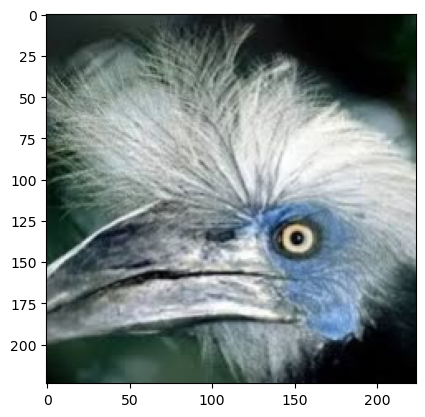

In [6]:
# look at an image for fun
plt.imshow(image.load_img(np.random.choice(train_images)))
plt.show()

# Loading in the pretrained model with ImageNet weights and Image Size

In [7]:
pretrained_model = PretrainedCNNModel(
    input_shape=IMAGE_SIZE + [3],
    include_top=False,
    weights="imagenet"
)

# Setting VGG19 Weights as Not Trainable

In [8]:
pretrained_model.trainable = False

# Creating Our Outputs Layers

In [9]:
K = len(folders)
x = Flatten()(pretrained_model.output)
x = Dense(1024, activation='relu')(x)
x = Dense(K, activation='softmax')(x)

# Creating the model with the VGG19 Pretrained Model and Custom Output Layers

In [10]:
model = Model(inputs=pretrained_model.input, outputs=x)

# Providing a Summary of the "new" model

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# Creating Object to Perform Augmentation

In [12]:
get_train_images = ImageDataGenerator(
    rescale=1/255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode="nearest",
    preprocessing_function=preprocess_input
)

# Creating a Generators for Training and Validation

In [13]:
train_generator = get_train_images.flow_from_directory(
    training_data_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
)

valid_generator = get_train_images.flow_from_directory(
    valid_data_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
)

Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


# Compiling VGG19 with new output layers

In [14]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=LEARNING_RATE),
    metrics=['accuracy']
)

# Fitting New Output Layers to Dataset

In [16]:
r = model.fit(
  train_generator,
  validation_data=valid_generator,
  epochs=EPOCHS,
  steps_per_epoch=int(np.ceil(len(train_images) / BATCH_SIZE)),
  validation_steps=int(np.ceil(len(valid_images) / BATCH_SIZE)),
)

Epoch 1/100
   8/1323 [..............................] - ETA: 9:42 - loss: 6.2387 - accuracy: 0.0059

KeyboardInterrupt: 